# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    zeros = np.where(arr == 0)[0]
    zeros
    idx = zeros + 1
    idx = idx[idx < arr.size]
    if idx.size == 0:
        return 'None'
    return arr[idx].max()

In [3]:
x = np.array([6, 2, 0, 3, 1, 3, 0, 7, 2])
max_element(x)

np.int64(7)

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    idx = np.abs(X - v).argmin()
    return X.flat[idx]

In [5]:
X = np.arange(0, 10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

np.int64(4)

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [6]:
def scale(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    sigma_safe = np.where(sigma == 0, 1, sigma)
    return (X - mu) / sigma_safe

In [7]:
X = np.random.randint(0, 10, size=(4, 3))   # случайные целые числа от 0 до 9
scale(X)

array([[-1.4852969 , -0.30151134,  0.57735027],
       [-0.08737041,  1.70856429, -0.96225045],
       [ 1.31055608, -0.70352647, -0.96225045],
       [ 0.26211122, -0.70352647,  1.34715063]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [8]:
def get_stats(X):          
    return {
       'det': np.linalg.det(A),                # определитель
       'trace': np.trace(A),                   # след
       'min': A.min(),                         # минимальный элемент
       'max': A.max(),                         # максимальный элемент
       'frobenius': np.linalg.norm(A, 'fro'),  # норма Фробениуса
       'eigenvalues': np.linalg.eigvals(A),    # собственные числа
       'inverse': np.linalg.inv(A),            # обратная матрица (если матрица невырождена) 
    }

In [9]:
A = np.random.normal(loc=10, scale=1, size=(3, 3))   # среднее 10, σ=1 [web:57][web:60][web:63][web:69]
get_stats(A)

{'det': np.float64(-2.9320725756135757),
 'trace': np.float64(29.130155244743197),
 'min': np.float64(8.380676476584934),
 'max': np.float64(10.58780499322701),
 'frobenius': np.float64(29.084008675979696),
 'eigenvalues': array([28.96692962,  0.41006681, -0.24684119]),
 'inverse': array([[ 0.14941557, -2.52189465,  2.8118264 ],
        [-1.20097098,  1.14074451,  0.1599811 ],
        [ 1.12590563,  1.31541084, -2.86819873]])}

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [10]:
max_values = []
for exp_num in range(100):
    A = np.random.normal(size=(10, 10))
    B = np.random.normal(size=(10, 10))
    C = A @ B
    max_values.append(C.max())

In [11]:
max_values = np.array(max_values)
mean_max = max_values.mean()
q95 = np.percentile(max_values, 95)
print(mean_max, q95)

8.60752491246751 12.846419016447966


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [12]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('2008.csv')  # путь к файлу при необходимости поменяй [web:95][web:99][web:101][web:105]

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [13]:
cancelled = df[df['Cancelled'] == 1] #отмененнвые рейсы
freq = cancelled['CancellationCode'].value_counts()  # Подсчет пвторений различных причин отмены
most_common_code = freq.idxmax() #самая часто встречающаяся причина (код)

if most_common_code == 'A':
    cans_cause = 'Проблемы на стороне перевозчика'
elif most_common_code == 'B':
    cans_cause = 'Погодные условия'
elif most_common_code == 'C':
    cans_cause = 'National Airspace System'
elif most_common_code == 'C':
    cans_cause = 'Безопасность'

print("Самая частая причина отмены:", cans_cause)

Самая частая причина отмены: Проблемы на стороне перевозчика


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [14]:
dist = df['Distance']

print("Среднее расстояние (мили):", dist.mean())
print("Минимальное расстояние (мили):", dist.min())
print("Максимальное расстояние (мили):", dist.max())

Среднее расстояние (мили): 724.5082571428571
Минимальное расстояние (мили): 31
Максимальное расстояние (мили): 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [15]:
#Все рейсы с этим минимальным расстоянием
min_dist_flights = df[df['Distance'] == dist.min()]
print("\nРейсы с минимальным расстоянием:")
print(min_dist_flights[['Year', 'Month', 'DayofMonth',
                        'FlightNum', 'Origin', 'Dest', 'Distance']])


Рейсы с минимальным расстоянием:
       Year  Month  DayofMonth  FlightNum Origin Dest  Distance
1116   2008     12          30         65    WRG  PSG        31
6958   2008     12          26         65    WRG  PSG        31
17349  2008      8          18         64    PSG  WRG        31
27534  2008      3          11         64    PSG  WRG        31
46082  2008      8           9         65    WRG  PSG        31
48112  2008      2          28         64    PSG  WRG        31


In [16]:
#Те же самые рейсы (по FlightNum) в другие дни
same_routes_other_days = df[
    (df['FlightNum'].isin(min_dist_flights['FlightNum']))
][['Year', 'Month', 'DayofMonth', 'FlightNum',
   'Origin', 'Dest', 'Distance']].drop_duplicates()

print("\nТе же маршруты в другие дни с другими расстояниями:")
print(same_routes_other_days)


Те же маршруты в другие дни с другими расстояниями:
       Year  Month  DayofMonth  FlightNum Origin Dest  Distance
501    2008      3          20         64    ATL  IAD       533
1116   2008     12          30         65    WRG  PSG        31
1389   2008      3          13         64    KTN  SEA       680
1517   2008      7          10         65    SEA  KTN       680
2619   2008      5          23         64    LAS  BOS      2381
...     ...    ...         ...        ...    ...  ...       ...
66529  2008     12          21         65    KTN  WRG        82
67172  2008      3          22         64    ATL  IAD       533
68264  2008      9           7         65    SJC  LAS       386
68338  2008      8           3         65    EWR  LAX      2454
69305  2008      1           5         65    JFK  TPA      1005

[78 rows x 7 columns]


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [17]:
# Количество вылетов по каждому аэропорту вылета
origin_counts = df['Origin'].value_counts()
# Аэропорт с максимальным числом вылетов
top_origin = origin_counts.idxmax()
print("Аэропорт с наибольшим числом вылетов:")
print(origin_counts.head(1))

Аэропорт с наибольшим числом вылетов:
Origin
ATL    4134
Name: count, dtype: int64


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [18]:
# Среднее AirTime по каждому аэропорту
mean_airtime = df.groupby('Origin')['AirTime'].mean()
print("Примеры средних AirTime по аэропортам:")
print(mean_airtime.head())

Примеры средних AirTime по аэропортам:
Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
Name: AirTime, dtype: float64


In [19]:
print("\nАэропорт с максимальным средним временем полёта:", mean_airtime.idxmax())
print("Значение среднего AirTime для него:", mean_airtime.max())


Аэропорт с максимальным средним временем полёта: SJU
Значение среднего AirTime для него: 205.2


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [20]:
# Был ли вылет рейса задержан
df['DepDelayed'] = df['DepDelay'] > 0   # 1, если задержка > 0 минут

# Группировка по аэропорту вылета
grouped = df.groupby('Origin')

# Исключаем аэропорты с числом рейсов < 1000
filtered = grouped.filter(lambda g: len(g) >= 1000) 

In [21]:
# Считаем долю задержанных рейсов длч аэропортов
share_delayed = filtered.groupby('Origin')['DepDelayed'].mean()  # среднее по булеву = доля 1

print("Задержанные вылеты по аэропортам:")
print(share_delayed)

print("\nАэропорт с наибольшей долей задержанных вылетов:", share_delayed.idxmax())
print("Доля задержанных рейсов в этом аэропорту:", share_delayed.max())

Задержанные вылеты по аэропортам:
Origin
ATL    0.420658
BOS    0.323580
BWI    0.452519
CLT    0.398400
DEN    0.446076
DFW    0.459363
DTW    0.353416
EWR    0.511159
IAH    0.468524
JFK    0.369692
LAS    0.434467
LAX    0.412584
LGA    0.306245
MCO    0.401345
MSP    0.366029
ORD    0.464507
PHL    0.420643
PHX    0.422452
SEA    0.438830
SFO    0.396307
SLC    0.320000
Name: DepDelayed, dtype: float64

Аэропорт с наибольшей долей задержанных вылетов: EWR
Доля задержанных рейсов в этом аэропорту: 0.5111591072714183


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [22]:
has_na = df.isna().any().any()
print("Есть ли пропуски в данных?", has_na)

Есть ли пропуски в данных? True


In [23]:
na_total = df.isna().sum().sum()
print("Всего пропусков в таблице:", na_total)

Всего пропусков в таблице: 355215


In [24]:
rows_with_na = df.isna().any(axis=1).sum()
print("Объекты с хотя бы одним пропуском:", rows_with_na)

Объекты с хотя бы одним пропуском: 70000


In [25]:
cols_with_na = df.isna().any(axis=0).sum()  # True по столбцам, затем считаем их [web:196][web:200][web:203]
print("Число признаков с хотя бы одним пропуском:", cols_with_na)

Число признаков с хотя бы одним пропуском: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [26]:
print("Есть ли пропуски в DepDelay?", df['DepDelay'].isna().any())
print("Число пропусков в DepDelay:", df['DepDelay'].isna().sum())

Есть ли пропуски в DepDelay? True
Число пропусков в DepDelay: 1399


In [27]:
rows_na_depdelay = df[df['DepDelay'].isna()]

# Посмотрим, что общего у этих рейсов
print(rows_na_depdelay[['Cancelled', 'Diverted']].drop_duplicates())
print("Уникальные значения Cancelled:", rows_na_depdelay['Cancelled'].unique())
print("Уникальные значения Diverted:", rows_na_depdelay['Diverted'].unique())

    Cancelled  Diverted
11          1         0
Уникальные значения Cancelled: [1]
Уникальные значения Diverted: [0]


У всех строк с DepDelay = NaN флаг Cancelled = 1 и Diverted = 0.
То есть пропуск в целевой переменной DeepDelay соответствуют отменённым рейсам, для которых задержка вылета (в минутах) не определена.

In [28]:
df_clean = df[~df['DepDelay'].isna()] # Удаление строк с пропущенным DepDelay
df_clean = df_clean[df_clean['DepDelay'] != 0] # Исключаем строки, где DepDelay == 0

cols_to_drop_extra = ['ArrDelay']  

# Выделяем целевую переменную и матрицу «объект–признак»
y = df_clean['DepDelay']
X = df_clean.drop(columns=['DepDelay'] + cols_to_drop_extra)

print("Форма X:", X.shape)
print("Форма y:", y.shape)

Форма X: (63404, 28)
Форма y: (63404,)


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [29]:
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

def split_time_feature(df, feature_name):
    time_vals = df[feature_name].copy() # копия исходного признака
    
    # извлекаем часы и минуты
    hour = time_vals // 100
    minute = time_vals % 100    
    
    # создаём новые признаки
    df[f'{feature_name}_Hour'] = hour
    df[f'{feature_name}_Minute'] = minute
    
    # удаляем исходный признак
    df = df.drop(columns=[feature_name])
    
    return df

In [30]:
for feature in time_features:
    if feature in X.columns:  # проверяем, что признак существует
        X = split_time_feature(X, feature)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [31]:
features_to_drop = [
    'ActualElapsedTime',
    'AirTime', 'TaxiIn', 'TaxiOut',
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 
    'SecurityDelay', 'LateAircraftDelay', 'ArrTime_Hour', 'ArrTime_Minute',
    'TailNum', 'Year' #признаки, которые надо исключить по условию
]
X.columns

X_clean = X.drop(columns=features_to_drop)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

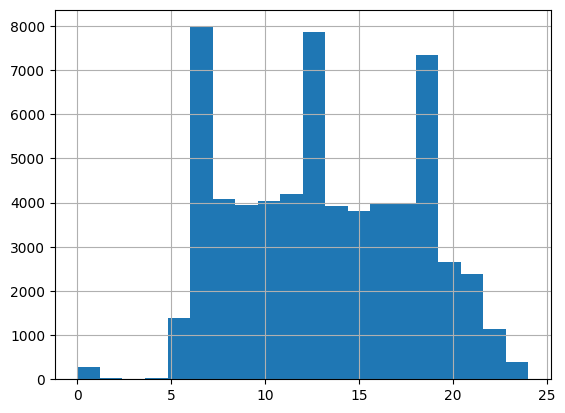

In [32]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

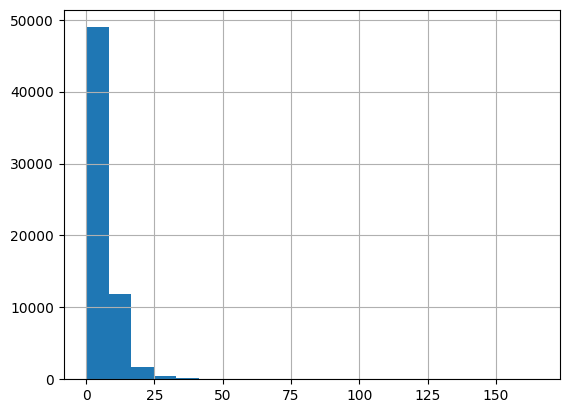

In [33]:
X['TaxiIn'].hist(bins=20)

<Axes: >

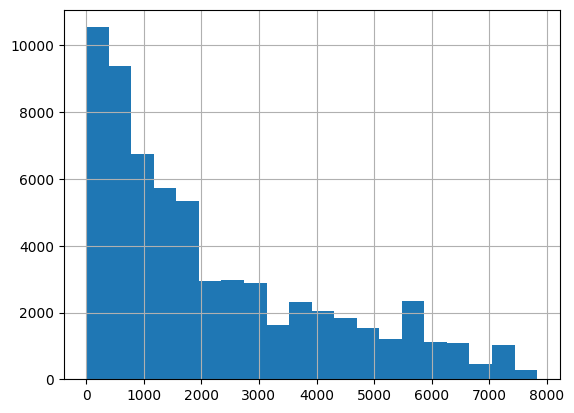

In [34]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

def transform_data(data):
    data = data.copy()  # работаем с копией
    
    # Разделяем на вещественные и категориальные признаки
    numeric_features = data.select_dtypes(include=[np.number]).columns
    categorical_features = data.select_dtypes(exclude=[np.number]).columns
    
    # Заменяем пропуски
    for col in numeric_features:
        data[col] = data[col].fillna(0)
    for col in categorical_features:
        data[col] = data[col].fillna('nan')
    
    # Масштабируем вещечтвенные признаки
    scaler = StandardScaler()
    X_numeric_scaled = pd.DataFrame(
        scaler.fit_transform(data[numeric_features]),
        columns=numeric_features,
        index=data.index
    )
    
    # 4. ONE-HOT БЕЗ prefix (✅ РАБОТАЕТ ВСЕГДА)
    X_categorical_encoded = pd.get_dummies(data[categorical_features], dummy_na=True)
    
    # 5. ОБЪЕДИНЯЕМ
    X_transformed = pd.concat([X_numeric_scaled, X_categorical_encoded], axis=1)
    return X_transformed

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [36]:
# Your code her# Применение
X_prepared = transform_data(X_clean)
print("Количество признаков:", X_prepared.shape[1])

Количество признаков: 636


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_prepared,           # матрица признаков
    y,                    # целевая переменная
    test_size=0.3,        # 30% на тест
    random_state=42       # для воспроизводимости
)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
sample_size = 1000                 # Берем 1000 объектов из обучающего массива
idx_sample = np.random.choice(X_train.index, size=sample_size, replace=False)
X_train_sample = X_train.loc[idx_sample]
y_train_sample = y_train.loc[idx_sample]

In [40]:
# Обучаем МНК
model = LinearRegression()
model.fit(X_train_sample, y_train_sample)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [41]:
# Предсказание на ранее выбранных объектах
y_train_pred = model.predict(X_train_sample)
mse_train = mean_squared_error(y_train_sample, y_train_pred)
r2_train = r2_score(y_train_sample, y_train_pred)

In [42]:
# Предсказание на тестовой выборке
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [43]:
print(f"MSE на обучающей подвыборке: {mse_train:.2f}")
print(f"R^2 на обучающей подвыборке: {r2_train:.3f}")
print(f"MSE на тестовой выборке:     {mse_test:.2f}")
print(f"R^2 на тестовой выборке:     {r2_test:.3f}")

MSE на обучающей подвыборке: 536.00
R^2 на обучающей подвыборке: 0.520
MSE на тестовой выборке:     1410.81
R^2 на тестовой выборке:     -0.055


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [44]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
alphas = np.logspace(-3, 3, 20)  # [0.001, 0.01, ..., 1000]

In [46]:
# Ridge регрессия (L2)
ridge = Ridge()
ridge_params = {'alpha': alphas}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)  # вся обучающая выборка

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Ridge()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.",{'alpha': array([1.0000...00000000e+03])}
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter indexes 

In [47]:
#Lasso-регрессия (L1)
lasso = Lasso(max_iter=2000, random_state=42)
lasso_params = {'alpha': alphas}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Lasso(max_ite...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.",{'alpha': array([1.0000...00000000e+03])}
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candi

In [53]:
print("Ridge:")
print(f"  Лучший α: {ridge_grid.best_params_['alpha']:.4f}")
print(f"  CV R^2:     {ridge_grid.best_score_:.3f}")

Ridge:
  Лучший α: 233.5721
  CV R^2:     0.289


In [49]:
print("Lasso:")
print(f"  Лучший α: {lasso_grid.best_params_['alpha']:.4f}")
print(f"  CV R²:     {lasso_grid.best_score_:.3f}")

# Тестируем лучшие модели на тестовой выборке
ridge_best = ridge_grid.best_estimator_
lasso_best = lasso_grid.best_estimator_

y_test_ridge = ridge_best.predict(X_test)
y_test_lasso = lasso_best.predict(X_test)

print("\n Тест:")
print(f"Ridge R^2: {r2_score(y_test, y_test_ridge):.3f}")
print(f"Lasso R^2: {r2_score(y_test, y_test_lasso):.3f}")


🏆 LASSO:
  Лучший α: 0.0183
  CV R²:     0.289

📊 ТЕСТОВЫЕ МЕТРИКИ:
Ridge test R²: 0.282
Lasso test R²: 0.282


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [54]:
# Обучаем на всей обучающей выборке
lasso_default = Lasso(random_state=42, max_iter=2000)
ridge_default = Ridge(random_state=42)

lasso_default.fit(X_train, y_train)
ridge_default.fit(X_train, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",42


In [57]:
def count_nonzero_coefs(model, threshold=1e-3):
    coefs = np.abs(model.coef_)
    nonzero_count = np.sum(coefs > threshold)
    zero_count = len(coefs) - nonzero_count
    return nonzero_count, zero_count

# Порог для "нулевых" коэффициентов
thresh = 1e-3

lasso_nz, lasso_z = count_nonzero_coefs(lasso_default, thresh)
ridge_nz, ridge_z = count_nonzero_coefs(ridge_default, thresh)

print(f"\nКол-во ненулевых коэффициентов:")
print(f"Lasso: {lasso_nz}/{len(lasso_default.coef_)} ненулевых ({100*lasso_nz/len(lasso_default.coef_):.1f}%)")
print(f"Ridge: {ridge_nz}/{len(ridge_default.coef_)} ненулевых ({100*ridge_nz/len(ridge_default.coef_):.1f}%)")


Кол-во ненулевых коэффициентов:
Lasso: 3/636 ненулевых (0.5%)
Ridge: 624/636 ненулевых (98.1%)


Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Предсказания Ridge на тестовой выборке
y_test_pred_ridge = ridge_default.predict(X_test)  # или ridge_grid.best_estimator_

# RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# MAE
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

# R^2
r2_ridge = r2_score(y_test, y_test_pred_ridge)

print("Mетрики Ridge на тестовой выборке:")
print(f"RMSE: {rmse_ridge:.2f} минут")
print(f"MAE:  {mae_ridge:.2f} минут") 
print(f"R^2:   {r2_ridge:.3f}")

Mетрики Ridge на тестовой выборке:
RMSE: 31.11 минут
MAE:  14.90 минут
R^2:   0.277


In [64]:
# Предсказания на обучающей выборке
y_train_pred_ridge = ridge_default.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
mae_train = mean_absolute_error(y_train, y_train_pred_ridge)
r2_train = r2_score(y_train, y_train_pred_ridge)

print("\n📊 ПОЛНЫЙ СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
print("Метрика\t\tTrain\t\tTest")
print(f"RMSE\t\t{rmse_train:.2f}\t\t{rmse_ridge:.2f}")
print(f"MAE \t\t{mae_train:.2f}\t\t{mae_ridge:.2f}")
print(f"R^2 \t\t{r2_train:.3f}\t\t{r2_ridge:.3f}")


📊 ПОЛНЫЙ СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
Метрика		Train		Test
RMSE		29.95		31.11
MAE 		14.64		14.90
R^2 		0.301		0.277


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [73]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 1000 объектов для обучения
sample_size = 1000
idx_sample = np.random.choice(X_train.index, size=sample_size, replace=False)
X_sample = X_train.loc[idx_sample]
y_sample = y_train.loc[idx_sample]

ridge_cv = RidgeCV(
    alphas=np.logspace(-3, 3, 20),  # 10^-3 до 10^3
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_cv.fit(X_sample, y_sample)

best_alpha = ridge_cv.alpha_
print(f"Лучший α: {best_alpha:.4f}")
print(f"CV R^2:    {ridge_cv.score(X_sample, y_sample):.3f}")

Лучший α: 54.5559
CV R^2:    0.361


Лучший alfa (простой CV): 54.5559
RidgeCV alfa:             54.5559


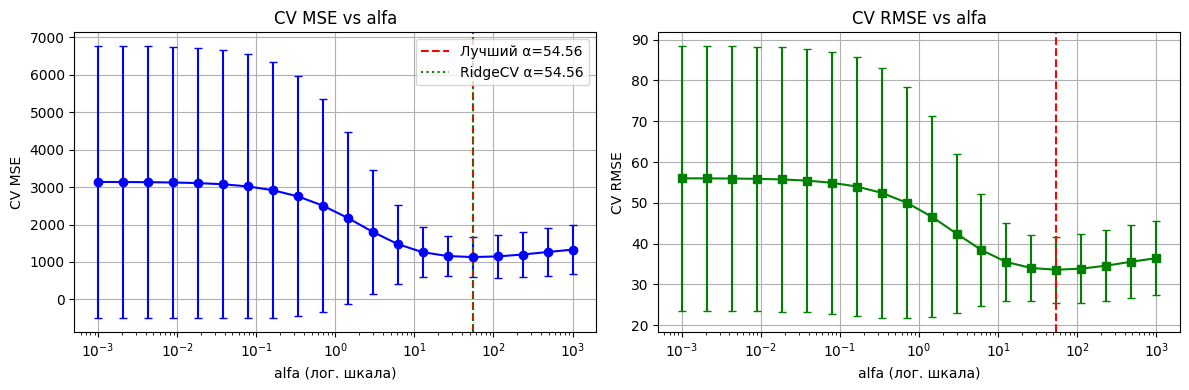

In [82]:
# Пересчитываем CV вручную (гарантированно работает!)
alphas = np.logspace(-3, 3, 20)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_mse_means = []
cv_mse_stds = []

for alpha in alphas:
    mse_scores = []
    for train_idx, val_idx in kf.split(X_sample):
        X_tr, X_val = X_sample.iloc[train_idx], X_sample.iloc[val_idx]
        y_tr, y_val = y_sample.iloc[train_idx], y_sample.iloc[val_idx]
        
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr, y_tr)
        mse_scores.append(mean_squared_error(y_val, ridge.predict(X_val)))
    
    cv_mse_means.append(np.mean(mse_scores))
    cv_mse_stds.append(np.std(mse_scores))

cv_mse_means = np.array(cv_mse_means)
cv_mse_stds = np.array(cv_mse_stds)

best_alpha_idx = np.argmin(cv_mse_means)
best_alpha_manual = alphas[best_alpha_idx]

print(f"Лучший alfa (простой CV): {best_alpha_manual:.4f}")
print(f"RidgeCV alfa:             {ridge_cv.alpha_:.4f}")

# ГРАФИКИ
plt.figure(figsize=(12, 4))

# 1. CV MSE vs α
plt.subplot(1, 2, 1)
plt.errorbar(alphas, cv_mse_means, yerr=cv_mse_stds, fmt='b-o', capsize=3)
plt.axvline(best_alpha_manual, color='r', linestyle='--', label=f'Лучший α={best_alpha_manual:.2f}')
plt.axvline(ridge_cv.alpha_, color='g', linestyle=':', label=f'RidgeCV α={ridge_cv.alpha_:.2f}')
plt.xscale('log')
plt.xlabel('alfa (лог. шкала)')
plt.ylabel('CV MSE')
plt.title('CV MSE vs alfa')
plt.legend()
plt.grid(True)

# 2. RMSE vs α
plt.subplot(1, 2, 2)
cv_rmse_mean = np.sqrt(cv_mse_means)
cv_rmse_std = cv_mse_stds / (2 * np.sqrt(cv_mse_means))
plt.errorbar(alphas, cv_rmse_mean, yerr=cv_rmse_std, fmt='g-s', capsize=3)
plt.axvline(best_alpha_manual, color='r', linestyle='--')
plt.xscale('log')
plt.xlabel('alfa (лог. шкала)')
plt.ylabel('CV RMSE')
plt.title('CV RMSE vs alfa')
plt.grid(True)

plt.tight_layout()
plt.show()

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

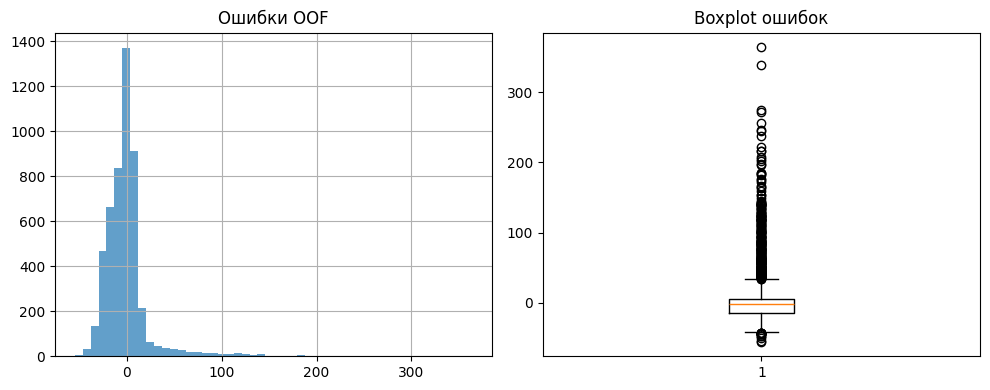

Средняя ошибка: -0.0
95% интервал: [-31, 77]


In [87]:
y_oof = cross_val_predict(Ridge(alpha=5), X_train[:5000], y_train.iloc[:5000], cv=5)
errors = y_train.iloc[:5000] - y_oof

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, alpha=0.7)
plt.title('Ошибки OOF')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot(errors)
plt.title('Boxplot ошибок')

plt.tight_layout()
plt.show()

print(f"Средняя ошибка: {errors.mean():.1f}")
print(f"95% интервал: [{np.percentile(errors, 2.5):.0f}, {np.percentile(errors, 97.5):.0f}]")